In [ ]:
import subprocess
subprocess.check_call(["pip", "install", "pyodbc"])
subprocess.check_call(["pip", "install", "matplotlib"])
subprocess.check_call(["pip", "install", "seaborn"])
subprocess.check_call(["pip", "install", "simplefilter"])

In [45]:
import pandas as pd
import pyodbc
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import simplefilter

In [10]:
load_dotenv()
servidor = os.getenv("SERVIDOR")
banco = os.getenv("BANCO")
driver = os.getenv("DRIVER")

str_conexao = f"DRIVER={driver};SERVER={servidor};DATABASE={banco};Trusted_Connection=yes;"

try:
    conexao = pyodbc.connect(str_conexao)

    consulta = """
    SELECT
        [rank]
    ,   [marcaCelular]
    ,   [volume]
    FROM [Analise].[RankMarcaCelular]
    """

    df = pd.read_sql(consulta, conexao)

except Exception as e:
    print(f"Erro de conexão: {str(e)}")

finally:
    if conexao:
        conexao.close()

C:\Users\ander\AppData\Local\Temp\ipykernel_22052\4216562400.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(consulta, conexao)


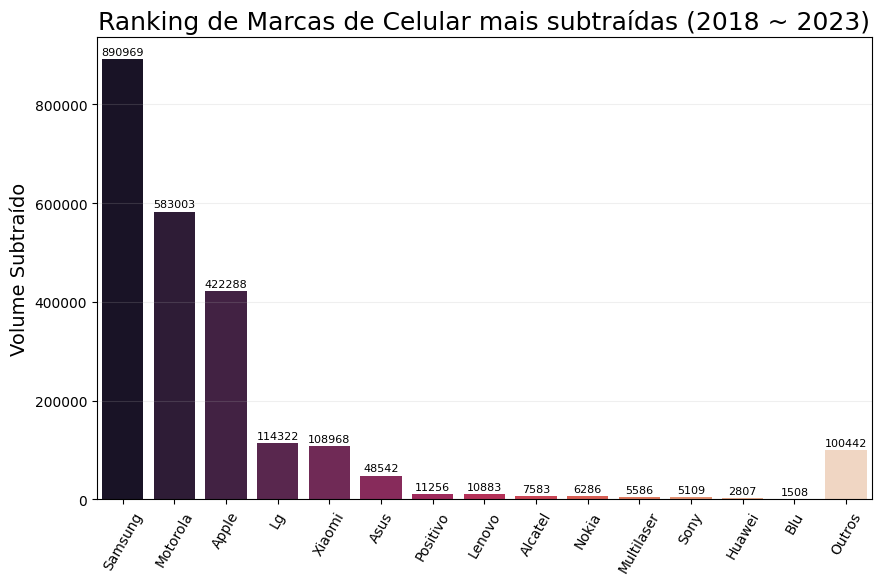

In [51]:
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="marcaCelular", y="volume", data=df, palette="rocket")
ax.set_title("Ranking de Marcas de Celular mais subtraídas (2018 ~ 2023)", fontsize=18)
ax.set_xlabel('')
ax.set_ylabel("Volume Subtraído", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.grid(axis='y', alpha=0.2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2,
                 p.get_height()),
                 ha='center',
                 va='center',
                 fontsize=8,
                 xytext=(0, 5),
                 textcoords='offset points')
fig = plt.gcf()
plt.show()

# salva a gráfico
fig.savefig('Graficos/marcas_celular_subtraidas.png', transparent=False, dpi=300, bbox_inches='tight')